# 活性化関数について
## なぜ非線形関数を用いるのか？
線形関数は線形関数の重ね合わせで表現できる。

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# step function
def step_function(x):
    return np.array(x > 0, dtype=int)

In [5]:
# tips
test_val = np.array([-1.0, 1.0, 2.0])
# test_val>0を判定
y = test_val > 0
print(y)
# test_val>0の判定結果をint型で返す
np.array(test_val > 0, dtype=int)

[False  True  True]


array([0, 1, 1])

In [6]:
# sigmoid function
def sigmoid(x):
    return 1 / (1+np.exp(-x))

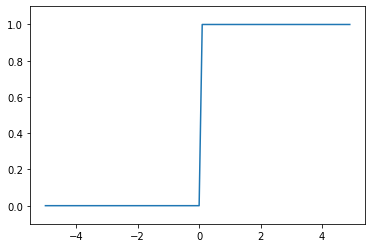

In [7]:
# step関数のグラフ
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

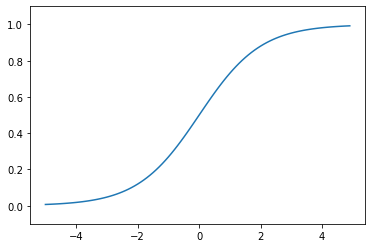

In [8]:
# sigmoid
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [9]:
# Rectified Linear Unit: ReLU
def relu(x):
    # maximumは入力された値から大きい法を出力する関数
    return np.maximum(0, x)

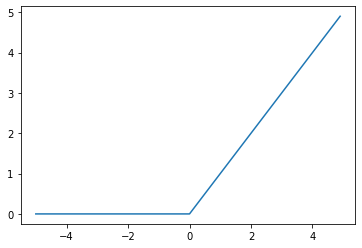

In [10]:
# ReLU
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.show()

### 3.4.2 各層における信号伝達の実装

#### 恒等関数

In [11]:
def identity_function(x): 
    # 恒等関数。そのままの値を返す。
    return x

#### network

In [12]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

In [13]:
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y

In [14]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


#### リスト操作

In [15]:
np.dot(x, network['W1'])

array([0.2, 0.5, 0.8])

In [16]:
# np.array([1, 2, 3]).shape # -> (3,)
print(network['W1'].shape) # -> (2, 3)
network['W1']

(2, 3)


array([[0.1, 0.3, 0.5],
       [0.2, 0.4, 0.6]])

### overflow対策後のsoftmax

In [17]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)     # to avoid overflow
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

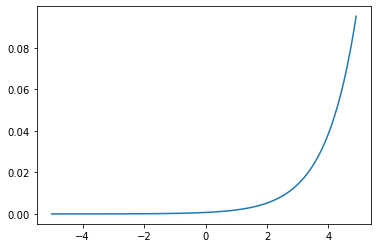

In [18]:
# Softmax
x = np.arange(-5.0, 5.0, 0.1)
y = softmax(x)
plt.plot(x, y)
# plt.ylim(-0.1, 1.1)
plt.show()

### softmax関数では、合計値が必ず1になる
* そのため、softmax関数の出力は「確率」として捉えることができる。
* softmaxを適用しても各要素の大小関係は変化しない

In [19]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(y.sum())

[0.01821127 0.24519181 0.73659691]
1.0


### 出力層の活性化関数
* 回帰問題: 恒等関数
* 分類問題: softmax

# MNISTデータセット

In [20]:
import sys, os
sys.path.append(os.pardir)      # 親ディレクトリDeep-learning-from-scratch下を参照できるようにする
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image    # Python image library
import pickle


In [21]:
(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

In [22]:
# データの形状を出力
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [23]:
# MNIST画像を表示
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))    # PIL用データオブジェクトに変換
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)
    
img = x_train[0]
label = t_train[0]
print(label)
    
print(img.shape)
img = img.reshape(28, 28)
print(img.shape)
# img_show(img)

5
(784,)
(28, 28)


### 3.6.2 neural networkの推論処理

In [24]:
def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("../ch03/sample_weight.pkl", 'rb') as f:  # 学習済みの重みパラメータを読み込み
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

In [25]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)        # もっとも確率の高い要素のインデックスを取得
    if p == t[i]:
        accuracy_cnt += 1

print("accuracy:" + str(float(accuracy_cnt)/len(x)))


accuracy:0.9352


### 前処理
* 正規化
    * 例: データ全体の平均や標準偏差を利用してデータ全体が0を中心に分布するように移動させる
* 白色化（whitening）
    * データ全体の分布の形状を均一にする

### 3.6.3 バッチ処理
バッチ単位で推論処理を行うことで計算を高速に行うことができる

In [26]:
x, t = get_data()
network = init_network()

batch_size = 100    # バッチの数
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)        # もっとも確率の高い要素のインデックスを取得
    accuracy_cnt += np.sum(p==t[i:i+batch_size])

print("accuracy:" + str(float(accuracy_cnt)/len(x)))


accuracy:0.9352


In [27]:
y_batch

array([[3.89409323e-08, 8.85489317e-06, 6.99534485e-06, 3.66066433e-06,
        8.43372788e-07, 2.54080842e-05, 2.54759607e-06, 1.08506129e-08,
        1.41208537e-03, 3.62794452e-07],
       [2.98676710e-08, 6.63879192e-08, 9.14277578e-08, 6.90589559e-07,
        4.69531951e-04, 1.04843148e-05, 3.57157944e-07, 1.15673492e-06,
        3.00109641e-05, 5.02863550e-04],
       [5.50639909e-03, 2.29429742e-09, 3.95249799e-06, 1.79974961e-06,
        8.36500362e-08, 1.94654742e-04, 4.49014891e-07, 1.15242474e-05,
        2.61186472e-07, 6.28909504e-07],
       [1.07703513e-10, 2.35559558e-03, 1.08601535e-05, 4.16096873e-06,
        2.63606421e-06, 1.75058824e-06, 3.21644393e-07, 7.49862738e-06,
        2.37022577e-05, 8.25172833e-07],
       [2.06350269e-05, 1.18354912e-07, 2.20191883e-04, 9.40575410e-06,
        2.95312901e-07, 7.29604517e-06, 1.14754391e-06, 1.66777261e-06,
        1.10823748e-06, 3.84532441e-08],
       [6.35171773e-08, 5.46185674e-07, 5.23685849e-05, 6.79152299e-06,
   

In [28]:
print(y_batch[0, :])
# 0~9までの合計が1になるのか？ -> ならない。0.0014608079
print(np.sum(y_batch[0, :]))

[3.8940932e-08 8.8548932e-06 6.9953448e-06 3.6606643e-06 8.4337279e-07
 2.5408084e-05 2.5475961e-06 1.0850613e-08 1.4120854e-03 3.6279445e-07]
0.0014608079


In [29]:
print(np.max(y_batch, axis=1))         # 各画像の最大確率を取得
print(np.argmax(y_batch, axis=1))      # 各画像の最大確率のインデックスを取得

[1.4120854e-03 5.0286355e-04 5.5063991e-03 2.3555956e-03 2.2019188e-04
 3.0784347e-04 5.6460849e-04 1.7250817e-03 3.0063717e-02 3.3742413e-02
 8.8577910e-04 4.7476817e-02 1.1948124e-03 1.2809685e-03 3.1624010e-03
 2.4059208e-03 3.6306120e-03 9.7209010e-03 1.1470844e-03 2.6445830e-02
 4.5646494e-03 1.6558747e-03 3.3709797e-04 7.6986346e-03 1.2852851e-03
 1.0238589e-04 4.8105934e-04 2.9961634e-03 2.2887676e-03 1.6018638e-02
 1.9731034e-02 5.3935084e-03 2.3803141e-03 7.1752388e-03 2.3038213e-03
 2.6794387e-02 7.9732056e-04 8.6109311e-04 1.5575090e-02 6.2190544e-02
 2.9676649e-04 5.3320266e-05 1.3764528e-02 1.5761463e-04 7.3532935e-04
 3.0689887e-03 3.9556641e-03 1.5558217e-03 1.0148580e-02 6.3433712e-03
 4.3702275e-03 5.8080480e-03 1.2571332e-01 6.5892912e-04 3.5845360e-04
 3.2469400e-04 3.3838490e-03 7.6933061e-03 7.0185931e-03 6.6782966e-05
 4.4042012e-03 1.9129062e-02 5.5826302e-03 1.3562920e-02 9.8823765e-03
 3.9063198e-03 8.2930364e-03 1.7697759e-03 2.6944289e-02 5.1401621e-03
 2.388

In [30]:
# range(start, end, step)に3つ引数を設定した場合の挙動 -> startからend-1までをstepずつ取得
temp = []
for i in range(0, 10, 2):
    temp.append(i)
print(temp)

[0, 2, 4, 6, 8]


### 4.2.1 2乗和誤差

In [33]:
def mean_squared_error(y, t):
    return .5 * np.sum((y-t)**2)

In [35]:
# 正解は2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# 2の確率が高いとき（正解）
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))
# 7の確率が高いとき（誤答） -> 二乗和誤差は大きくなる
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


### 4.2.2. 交差エントロピー誤差

正解ラベルtは、one-hot表現（正解だけ1, ほかは0）なので、交差エントロピー誤差は、正解ラベルが1の出力の自然対数を計算しているだけ。
ほかは$t=0$となり、$E=0$となるから。

In [36]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y+delta))

In [37]:
# 正解は2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# 2の確率が高いとき（正解）
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))
# 7の確率が高いとき（誤答） -> 交差エントロピー誤差は大きくなる
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))


0.510825457099338
2.302584092994546


In [39]:
cross_entropy_error(0.6, 1)

0.510825457099338

### ミニバッチ学習
データを無作為に選び出して学習を行う。

In [40]:
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)
    
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [41]:
# 訓練データから無作為に10枚だけ抜き出す
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [44]:
# ランダムにインデックスを取得
np.random.choice(60000, 10)

array([ 6087,  9901, 23994,  4018, 17057, 22553,  7255,  5792, 23223,
       52765])

In [45]:
# ミニバッチに対応した交差エントロピー誤差
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    delta = 1e-7
    return -np.sum(np.log(y[np.arange(batch_size), t])+delta) / batch_size

In [63]:
# cross_entropy_errorを解読
t = np.array([2, 3, 4, 2, 3, 4, 5, 2, 1, 9])
# 2の確率が高いとき（正解）
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])

# yの次元を確認
print(y.ndim)
print(y.size)
t = t.reshape(1, t.size)
y = y.reshape(1, y.size)
print(y.ndim)   # 2次元配列に変換
print(t)
print(y)


In [75]:
print(np.arange(10))
y[0, t]     # 0行スタート

[0 1 2 3 4 5 6 7 8 9]


array([[0.6 , 0.  , 0.05, 0.6 , 0.  , 0.05, 0.1 , 0.6 , 0.05, 0.  ]])